<a href="https://colab.research.google.com/github/aquangnguyen1992/tensorflow_colab/blob/mnist_max/mnist_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import data from Google Drive and setup the workspace***

In [2]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree('/content/drive/My Drive/MNIST','/content/MNIST')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/MNIST'

In [3]:
train_data_path = '/content/MNIST/train_max_x'
test_data_path = '/content/MNIST/test_max_x'
label_file = '/content/MNIST/train_max_y.csv'

# ***Read the dataset and show an example***

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_pickle(train_data_path).astype(np.uint8)
#test_data = pd.read_pickle(test_data_path)
train_label = pd.read_csv(label_file)
y = train_label['Label']

In [74]:
'''dataset = (dataset/255.0 - 0.5).astype(np.float16)
#test_data = test_data/255.0
number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]'''

number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]

def data_preprocessing(data):
  dataout = (data/255.0).astype(np.float16)
  return dataout


7 [[0.306  0.341  0.3647 ... 0.3098 0.3293 0.3176]
 [0.3293 0.353  0.3647 ... 0.2864 0.3333 0.3372]
 [0.3687 0.3882 0.3765 ... 0.2393 0.2864 0.3254]
 ...
 [0.153  0.1569 0.1726 ... 0.3137 0.3176 0.3333]
 [0.1804 0.1804 0.2    ... 0.2705 0.2744 0.3215]
 [0.204  0.204  0.1804 ... 0.255  0.2666 0.2783]]


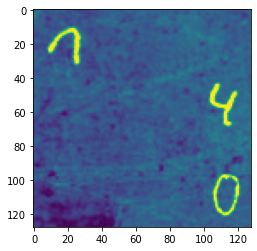

In [75]:
i = np.random.randint(0, X_train.shape[0])
sample = data_preprocessing(X_train)[i]
print(Y_train[i], sample)
plt.imshow(sample.astype(np.float32))

[[0.2705 0.2666 0.2903 0.2666 0.1921 0.1333 0.1255 0.1765 0.1804 0.196
  0.2235 0.2471 0.2666 0.2903 0.3137 0.349  0.353  0.349  0.3254 0.2942
  0.2783 0.2783 0.2903 0.2588 0.2666 0.2783 0.2744 0.255  0.2313 0.2354]
 [0.251  0.2432 0.2666 0.2705 0.2432 0.2118 0.204  0.255  0.2393 0.2354
  0.251  0.2666 0.2705 0.2744 0.2744 0.302  0.3176 0.3333 0.3254 0.298
  0.2825 0.2903 0.302  0.298  0.2942 0.2942 0.2903 0.2783 0.2705 0.2942]
 [0.255  0.2313 0.2432 0.2705 0.2903 0.2903 0.2783 0.3137 0.2864 0.2705
  0.2783 0.2864 0.2705 0.2471 0.2354 0.2588 0.2864 0.3137 0.3098 0.2864
  0.2705 0.2744 0.2903 0.3254 0.3137 0.302  0.2903 0.2783 0.2783 0.3137]
 [0.2744 0.2432 0.2313 0.2588 0.302  0.3098 0.2825 0.2903 0.2744 0.2744
  0.2903 0.2903 0.2588 0.2313 0.2274 0.2432 0.2666 0.2864 0.2783 0.255
  0.2393 0.2432 0.2588 0.3176 0.302  0.2903 0.2744 0.2588 0.255  0.2783]
 [0.2666 0.2393 0.2196 0.2432 0.2864 0.2903 0.2588 0.2079 0.2118 0.2393
  0.2744 0.2705 0.2354 0.2235 0.2432 0.2274 0.2393 0.251  0.243

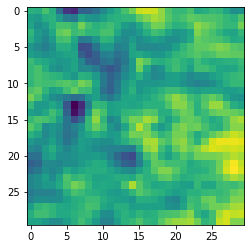

In [76]:
display = sample[55:85, 40:70]
plt.imshow(display.astype(np.float32))
print(display)

(40000, 128, 128) (10000, 128, 128)


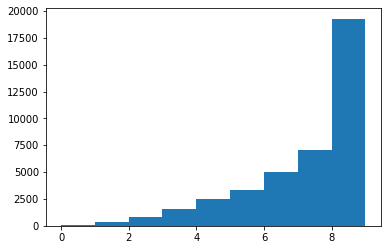

In [77]:
#X_train = np.expand_dims(X_train, axis=3)
#X_test = np.expand_dims(X_test, axis=3)

#print(X_train.shape, X_test.shape)
plt.hist(np.array(Y_train), bins=range(len(number_of_label[0])))
number_of_label[0]

b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train = b

b = np.zeros((Y_test.size, Y_test.max()+1))
b[np.arange(Y_test.size),Y_test] = 1
Y_test = b

def data_preprocessing2(data):
  dataout = (data/255.0)
  #dataout = np.expand_dims(dataout, axis=3)
  return dataout

print(data_preprocessing2(X_train).shape, data_preprocessing2(X_test).shape)

# ***Pipeline X***

In [87]:
import cv2
def value_crop(input_im, output_size=(28,28), max_detection=3):
  if np.max(input_im) <= 2:
    input_im = (input_im*255).astype(np.uint8)
  ret, black_white = cv2.threshold(input_im, 254, 255, 0)
  contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cropped_section = None

  contour_info = []
  for contour in contours:
    point1 = np.min(contour, axis=0)[0]
    point2 = np.max(contour, axis=0)[0]
    if (point2[0] - point1[0] < 15) or (point2[1] - point1[1] < 15):
       continue
    else:
      contour_info.append([point1, point2, np.linalg.norm(point2-point1)])

  # What happen if less than 3 detection
  if len(contour_info) <= max_detection:
    for contour in contour_info:
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        cropped_section = np.resize([black_white[point1[1]:point2[1], point1[0]:point2[0]]], output_size)
        cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        temp_im = np.resize([black_white[point1[1]:point2[1], point1[0]:point2[0]]], output_size)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
    
    # Padding to have max_detection
    padding = max_detection - len(contours)
    for i in range(0, padding):
      temp_im = np.zeros(output_size)
      temp_im = np.expand_dims(temp_im, axis=2)
      cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

  else: # More than 3 detections, get the 3 with biggest size
    pass

  return contour_info

output = value_crop(sample)
print(len(output), output[0])

12 [array([108, 117], dtype=int32), array([110, 119], dtype=int32), 2.8284271247461903]


In [81]:
import cv2
def value_crop(input_im, output_size=(28,28), max_detection=3):
  if np.max(input_im) <= 2:
    input_im = (input_im*255).astype(np.uint8)
  ret, black_white = cv2.threshold(input_im, 254, 255, 0)
  contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cropped_section = None

  contour_info = []
  for contour in contours:
    point1 = np.min(contour, axis=0)[0]
    point2 = np.max(contour, axis=0)[0]
    contour_info.append([point1, point2, np.linalg.norm(point2-point1)])

  # What happen if less than 3 detection
  if len(contour_info) <= max_detection:
    for contour in contour_info:
      point1 = contour[0]
      point2 = contour[1]
      if (point2[0] - point1[0] < 10) and (point2[1] - point1[1] < 10):
        continue
      else:
        if cropped_section is None:
          cropped_section = np.resize([black_white[point1[1]:point2[1], point1[0]:point2[0]]], output_size)
          cropped_section = np.expand_dims(cropped_section, axis=2)
        else:
          temp_im = np.resize([black_white[point1[1]:point2[1], point1[0]:point2[0]]], output_size)
          temp_im = np.expand_dims(temp_im, axis=2)
          cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
    padding = max_detection - len(contours)
    for i in range(0, padding):
      temp_im = np.zeros(output_size)
      temp_im = np.expand_dims(temp_im, axis=2)
      cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

  else: # More than 3 detections, get the 3 with biggest size
    

  return cropped_section

def pipeline_X(data):
  dataout = None
  for each_image in data:
    new_detection = value_crop(each_image)
    if new_detection is not None:
      new_detection = np.expand_dims(new_detection, axis=0)
      if dataout is None:
        dataout = new_detection
      else:
        print(dataout.shape, new_detection.shape)
        dataout = np.concatenate((dataout, new_detection), axis=0)
  return dataout

result = pipeline_X(X_train)
print(result.shape)

plt.imshow(sample.astype(np.float32))
ret, black_white = cv2.threshold((sample*255).astype(np.uint8), 254, 255, 0)
plt.imshow(black_white.astype(np.float32))
contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
j = np.random.randint(0, len(contours))
print(len(contours), len(contours[0]), np.min(contours[j], axis=0), np.max(contours[j], axis=0))
point1 = np.min(contours[j], axis=0)[0]
point2 = np.max(contours[j], axis=0)[0]
print(point1, point2)
cropped = black_white[point1[1]:point2[1], point1[0]:point2[0]]
plt.imshow(cropped)

out = value_crop(sample, (28,28))
print(out.shape)
#print(out)
plt.imshow(out[:,:,1])

(1, 28, 28, 1) (1, 28, 28, 4)


ValueError: ignored

In [40]:
a = [[2,3]]
a.append([3,4])
print(np.array(a).shape)

(2, 2)


# ***Keras Solution***

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

In [36]:
def create_model(conv2d_1=32, str_1=1, conv2d_2=32, str_2=1, dense_node=32, dr=0.0):
  my_model = Sequential()
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), strides=(str_1, str_1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
  my_model.add(Conv2D(conv2d_2, kernel_size=(3,3), activation='relu'))
  my_model.add(MaxPool2D(pool_size=(2,2)))
  my_model.add(Flatten())
  my_model.add(Dropout(dr))
  my_model.add(BatchNormalization())
  my_model.add(Dense(dense_node, activation='relu'))
  my_model.add(Dropout(dr))
  #my_model.add(Dense(3, activation='relu'))
  my_model.add(Dense(len(number_of_label[0]), activation='softmax'))

  #my_model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2], 1)))
  #my_model.add(Dense(128*128, activation='relu'))
  #my_model.add(Dense(len(number_of_label[0]), activation='softmax'))
  #my_model.add(Dense(1, activation='relu'))

  optimizerAdam = Adam(lr=0.0001, amsgrad=True)
  optimizerSGD = SGD(learning_rate=0.005, momentum=0.001, nesterov=False)
  
  my_model.compile(loss='categorical_crossentropy',
                optimizer=optimizerSGD,
                metrics=['accuracy'])

  #my_model.compile(loss='sparse_categorical_crossentropy',
  #              optimizer=optimizerSGD,
  #              metrics=['accuracy'])
  
  return my_model

In [33]:
X_train_float = X_train.astype(np.float16)
Processed_X = tf.py_function(data_preprocessing2, inp=[X_train_float], Tout=tf.float16)

In [37]:
BATCH = 256
my_model = create_model(conv2d_1=128, str_1=2, conv2d_2=128, str_2=1, dense_node=64, dr=0.4)
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 63, 63, 128)       1280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 115200)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 115200)            460800    
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [38]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
filepath="weight_model_cnn_best.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_weights_only=False, verbose=1, save_best_only=True, mode='max')


history = my_model.fit(
  Processed_X, Y_train,
  epochs=300, validation_split = 0.2, verbose=1,
  batch_size = BATCH, shuffle=True,
  callbacks=[early_stop, checkpoint])

Epoch 1/300
125/125 [==============================] - ETA: 0s - loss: 2.1458 - accuracy: 0.2022
Epoch 00001: val_accuracy improved from -inf to 0.26575, saving model to weight_model_cnn_best.h5
125/125 [==============================] - 73s 586ms/step - loss: 2.1458 - accuracy: 0.2022 - val_loss: 2.2216 - val_accuracy: 0.2657
Epoch 2/300
112/125 [=========================>....] - ETA: 6s - loss: 2.0301 - accuracy: 0.2356

KeyboardInterrupt: ignored

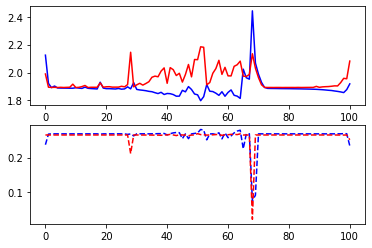

In [ ]:
plt.subplot(211)
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')

plt.subplot(212)
plt.plot(history.history['accuracy'], '--b')
plt.plot(history.history['val_accuracy'], '--r')